In [1]:
import numpy as np
import scipy as sp
from importlib import reload
import neuraltda.topology2 as tp2
import neuraltda.plotting as tpplt
import neuraltda.spikeutils as su
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import neuraltda.simpComp as sc
import neuraltda.spectralAnalysis as sa
import pandas as pd
import h5py as h5
import pickle
import networkx as nx
from sklearn.manifold import MDS

# Setup figure save path
daystr = datetime.datetime.now().strftime('%Y%m%d')
figsavepth = '/home/brad/DailyLog/'+daystr+'/'
print(figsavepth)

/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


/home/brad/DailyLog/20180328/


In [2]:
# Set up birds and block_paths
birds = ['B1083', 'B1056', 'B1235', 'B1075']
bps = {'B1083': '/home/brad/krista/B1083/P03S03/', 'B1075': '/home/brad/krista/B1075/P01S03/',
       'B1235': '/home/brad/krista/B1235/P02S01/', 'B1056': '/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/',
       'B1056': '/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/'}

# Binning Parameters
windt = 10.0                      # milliseconds
dtovr = 0.5*windt                 # milliseconds
segment_info = [0, 0]             # use full Trial
cluster_group = ['Good']          # use just good clusters
comment = 'StimSpace'             # BootStrap Populations
bdfs = {}                         # Dictionary to store bdf

# computation parameters
thresh = 4.0

In [3]:
# Loop through each bird in our list and bin the data
for bird in birds:
    block_path = bps[bird]
    bfdict = tp2.dag_bin(block_path, windt, segment_info, cluster_group=cluster_group, dt_overlap=dtovr, comment=comment)
    bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
    print(bdf)
    bdfs[bird] = bdf

/home/brad/krista/B1083/P03S03/binned_data/win-10.0_dtovr-5.0_seg-0-0-StimSpace/20180327T224655Z-10.0-5.0.binned
/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/binned_data/win-10.0_dtovr-5.0_seg-0-0-StimSpace/20180327T224705Z-10.0-5.0.binned
/home/brad/krista/B1235/P02S01/binned_data/win-10.0_dtovr-5.0_seg-0-0-StimSpace/20180327T224720Z-10.0-5.0.binned
/home/brad/krista/B1075/P01S03/binned_data/win-10.0_dtovr-5.0_seg-0-0-StimSpace/20180327T224731Z-10.0-5.0.binned


In [4]:
# select bird
bird = 'B1056'
stim = 'I_scaled_burung'
trial = 0
block_path = bps[bird]
bdf = bdfs[bird]
with h5.File(bdf, 'r') as f:
    print(list(f.keys()))
    poptens = np.array(f[stim]['pop_tens'])
    ncells = 2*poptens.shape[0]
    ntrials = poptens.shape[2]
    popmat = poptens[:, :, trial]



['A_scaled_burung', 'B_scaled_burung', 'C_scaled_burung', 'D_scaled_burung', 'E_scaled_burung', 'F_scaled_burung', 'G_scaled_burung', 'H_scaled_burung', 'I_scaled_burung', 'J_scaled_burung', 'K_scaled_burung', 'L_scaled_burung', 'M_scaled_burung', 'N_scaled_burung', 'O_scaled_burung', 'P_scaled_burung']


In [5]:
au = sc.binnedtobinary(popmat, thresh)
maxsimps = sc.binarytomaxsimplex(au, rDup=True)


In [6]:
g = sc.stimspacegraph_nx(maxsimps, ncells)
nx.info(g)

'Name: \nType: Graph\nNumber of nodes: 2644\nNumber of edges: 9807\nAverage degree:   7.4183'

In [7]:
dmat = nx.floyd_warshall_numpy(g)

In [8]:
gmds = MDS(n_jobs=-2, dissimilarity='precomputed')
embed_pts = gmds.fit_transform(dmat)

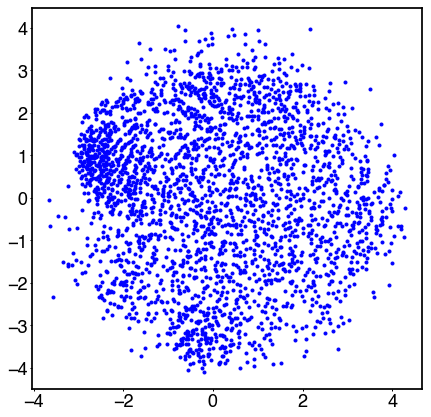

In [9]:
plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')
fig = plt.figure(figsize=(7,7))
plt.plot(embed_pts[:, 0], embed_pts[:, 1], 'b.')

['A_scaled_burung', 'B_scaled_burung', 'C_scaled_burung', 'D_scaled_burung', 'E_scaled_burung', 'F_scaled_burung', 'G_scaled_burung', 'H_scaled_burung', 'I_scaled_burung', 'J_scaled_burung', 'K_scaled_burung', 'L_scaled_burung', 'M_scaled_burung', 'N_scaled_burung', 'O_scaled_burung', 'P_scaled_burung']
computing graph...
computing distances...
computing mds...


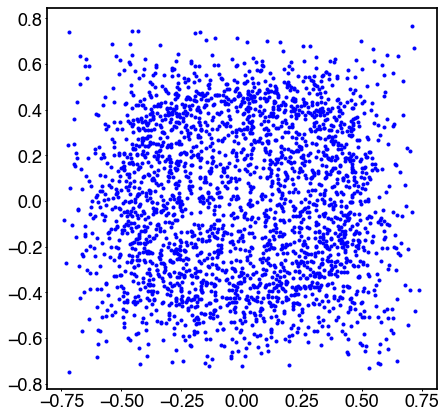

computing graph...
computing distances...
computing mds...


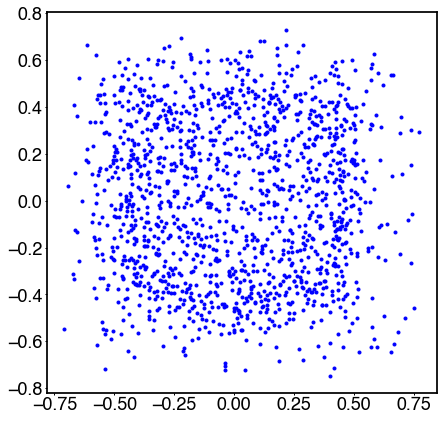

computing graph...
computing distances...
computing mds...


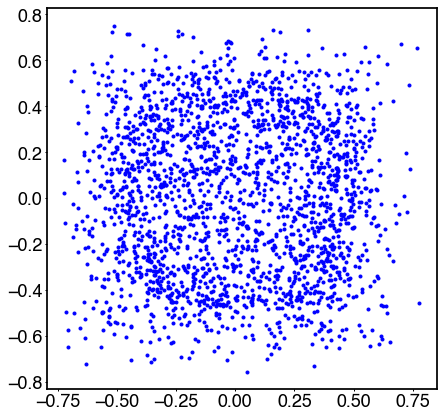

computing graph...
computing distances...
computing mds...


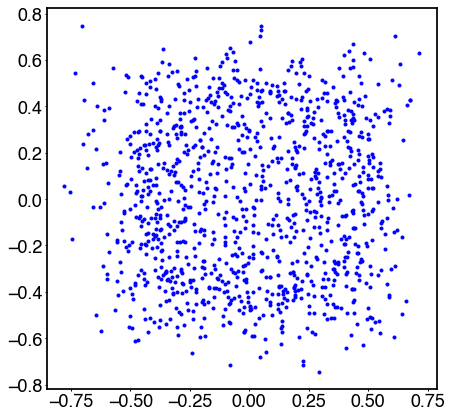

computing graph...
computing distances...
computing mds...


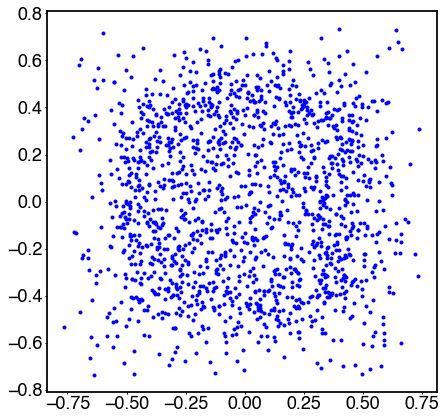

computing graph...
computing distances...
computing mds...


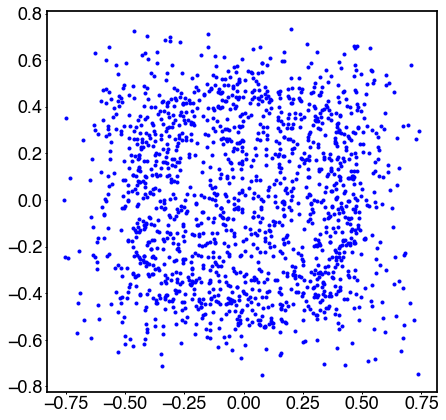

computing graph...
computing distances...
computing mds...


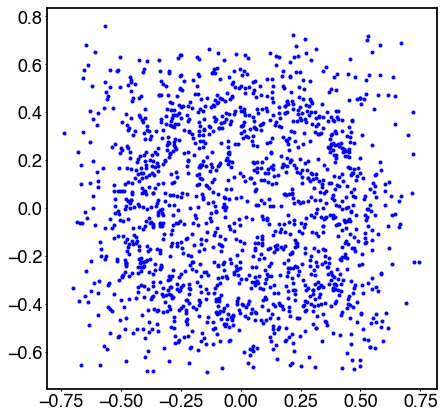

computing graph...
computing distances...
computing mds...


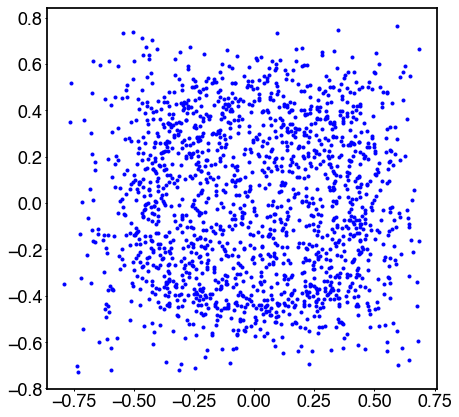

computing graph...
computing distances...
computing mds...


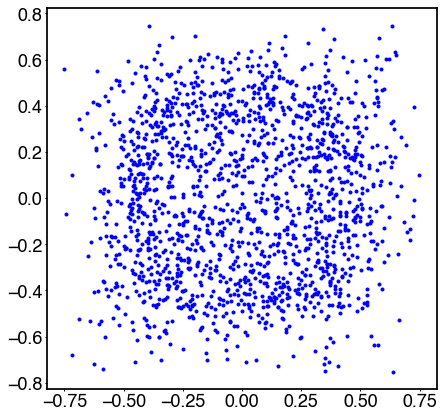

computing graph...
computing distances...
computing mds...


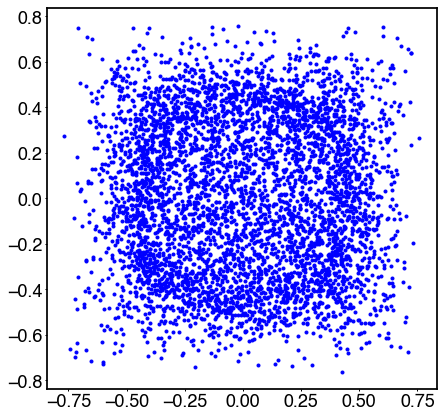

computing graph...
computing distances...
computing mds...


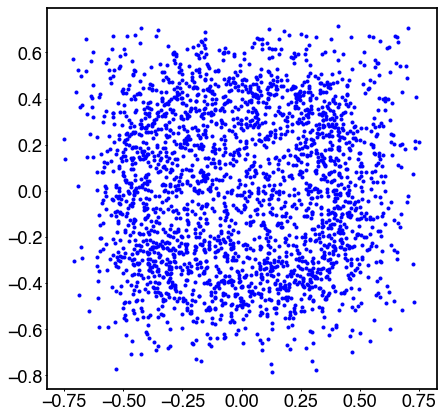

computing graph...
computing distances...
computing mds...


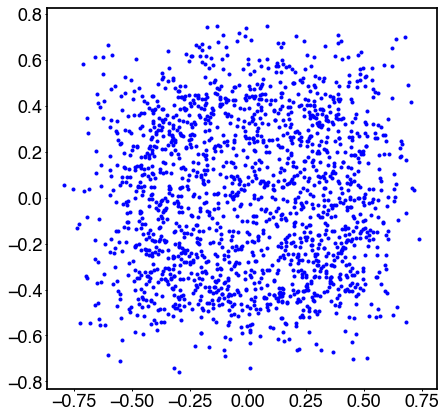

computing graph...
computing distances...
computing mds...


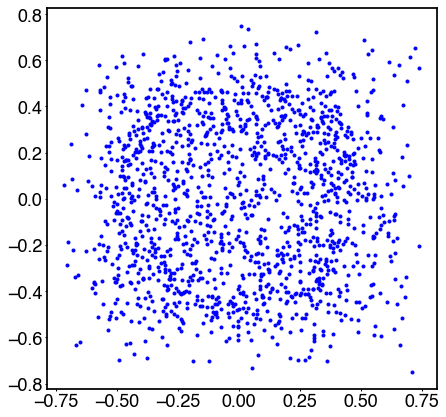

computing graph...
computing distances...
computing mds...


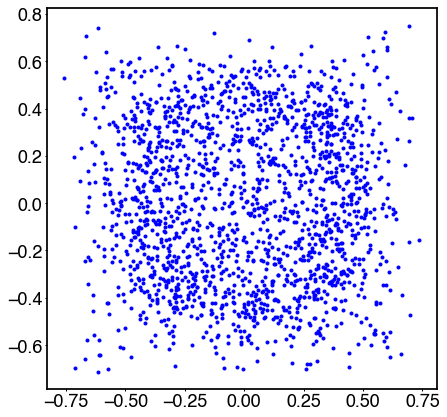

computing graph...
computing distances...
computing mds...


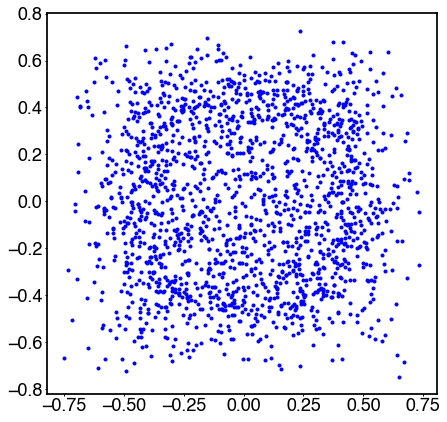

computing graph...
computing distances...
computing mds...


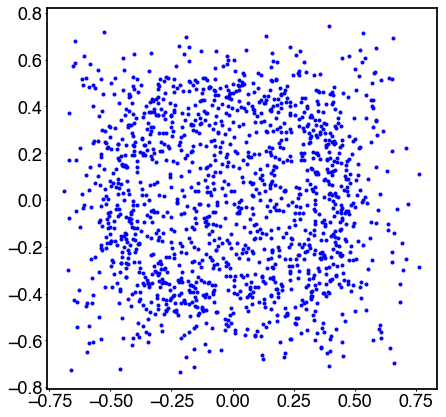

computing graph...
computing distances...
computing mds...


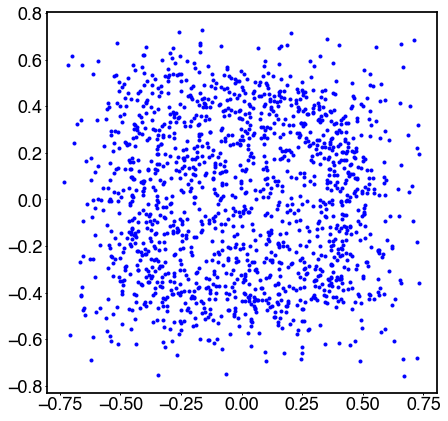

computing graph...
computing distances...
computing mds...


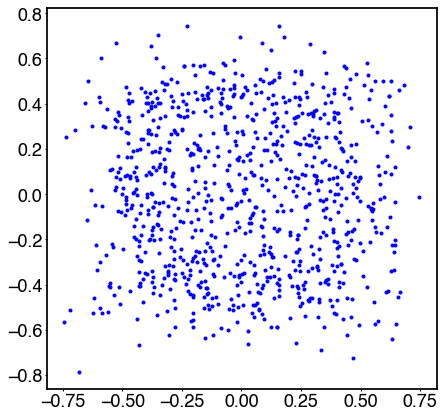

computing graph...
computing distances...
computing mds...


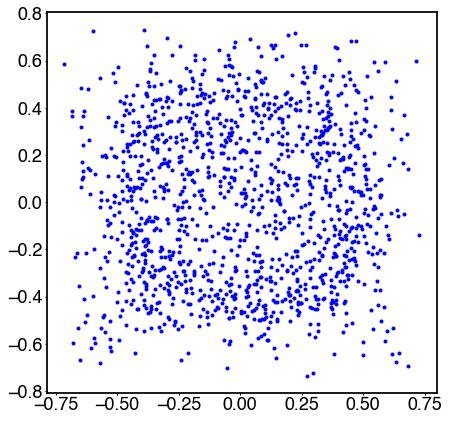

computing graph...
computing distances...
computing mds...


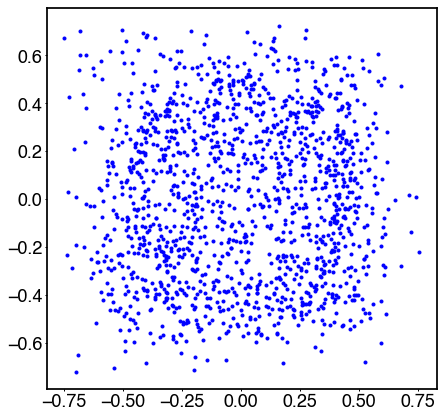

In [21]:
# select bird
bird = 'B1056'
stim = 'I_scaled_burung'
trial = 1
block_path = bps[bird]
bdf = bdfs[bird]
d_max = 30
dmats = []
graphs = []
noise_pc = 0.005
with h5.File(bdf, 'r') as f:
    print(list(f.keys()))
    poptens = np.array(f[stim]['pop_tens'])
    ncells = 2*poptens.shape[0]
    ntrials = poptens.shape[2]
    for trial in range(ntrials):
        popmat = poptens[:, :, trial]
        au = sc.binnedtobinary(popmat, thresh)
        maxsimps = sc.binarytomaxsimplex(au, rDup=True)
        print('computing graph...')
        g = sc.stimspacegraph_nx(maxsimps, ncells)
        graphs.append(g)
        nx.info(g)
        print('computing distances...')
        dmat = nx.floyd_warshall_numpy(g)
        noise_amps = noise_pc*dmat
        noise = np.multiply(noise_amps, np.random.randn(dmat.shape[0], dmat.shape[1])) 
        noise = (noise + noise.T)/2
        dmat += noise
        dmats.append(dmat)
        #Adjust inf dists
        dmat[np.isnan(dmat)] = d_max
        print('computing mds...')
        gmds = MDS(n_jobs=-2, dissimilarity='precomputed', metric=False)
        embed_pts = gmds.fit_transform(dmat)
        plt.figure()
        plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')
        fig = plt.figure(figsize=(7,7))
        plt.plot(embed_pts[:, 0], embed_pts[:, 1], 'b.')
        plt.show()

In [15]:
G = graphs[0]
nx.info(G)
nx.is_connected(G)
G.edges((10,31), data=True)

ns = list(G.nodes())

cn = [(x,) for x in range(101)]
dmat = np.zeros((len(cn), len(cn)))
for ind in range(len(cn)):
    for indw in range(ind+1, len(cn)):
        try:
            dmat[ind, indw] = nx.shortest_path_length(G, ns[ind], ns[indw], weight='weight')
        except ValueError:
            print(ns[ind], ns[indw])

In [16]:
dmat = dmat + dmat.T

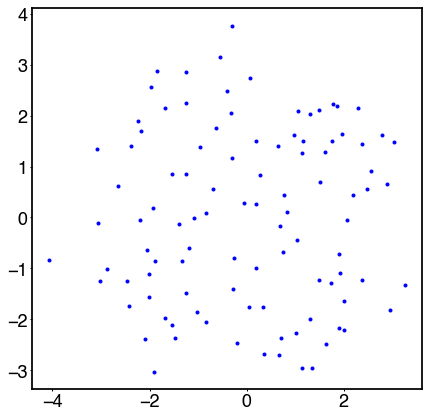

In [18]:
gmds = MDS(n_jobs=-2, dissimilarity='precomputed')
embed_pts = gmds.fit_transform(dmat)
plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')
fig = plt.figure(figsize=(7,7))
plt.plot(embed_pts[:, 0], embed_pts[:, 1], 'b.')

In [ ]:
nx.shortest_path_length(G, (4,28), (4,), weight='weight')

In [ ]:
nx.negative_edge_cycle(G)

In [ ]:
G.edges(data=True)

In [23]:
# do everything
allmaxsimps = []
with h5.File(bdf, 'r') as f:
    print(list(f.keys()))
    stims = list(f.keys())
    for stim in stims:
        poptens = np.array(f[stim]['pop_tens'])
        ncells = 2*poptens.shape[0]
        ntrials = poptens.shape[2]
        for trial in range(ntrials):
            popmat = poptens[:, :, trial]
            au = sc.binnedtobinary(popmat, thresh)
            maxsimps = sc.binarytomaxsimplex(au, rDup=True)
            allmaxsimps.append(maxsimps)

['A_scaled_burung', 'B_scaled_burung', 'C_scaled_burung', 'D_scaled_burung', 'E_scaled_burung', 'F_scaled_burung', 'G_scaled_burung', 'H_scaled_burung', 'I_scaled_burung', 'J_scaled_burung', 'K_scaled_burung', 'L_scaled_burung', 'M_scaled_burung', 'N_scaled_burung', 'O_scaled_burung', 'P_scaled_burung']


In [27]:
ams = np.concatenate(allmaxsimps)
g = sc.stimspacegraph_nx(ams, ncells)